In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('OnlineNewsPopularity.csv')

In [3]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
df.shape

(39644, 61)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [7]:
# removing duplicates
df=df.drop_duplicates()

In [8]:
df.shape  # there are no duplicates

(39644, 61)

In [9]:
#checking for all variables that contain missing values
n=df.isna().sum()
n[n>0]

Series([], dtype: int64)

In [10]:
df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [11]:
df.dtypes

url                               object
 timedelta                       float64
 n_tokens_title                  float64
 n_tokens_content                float64
 n_unique_tokens                 float64
                                  ...   
 title_subjectivity              float64
 title_sentiment_polarity        float64
 abs_title_subjectivity          float64
 abs_title_sentiment_polarity    float64
 shares                            int64
Length: 61, dtype: object

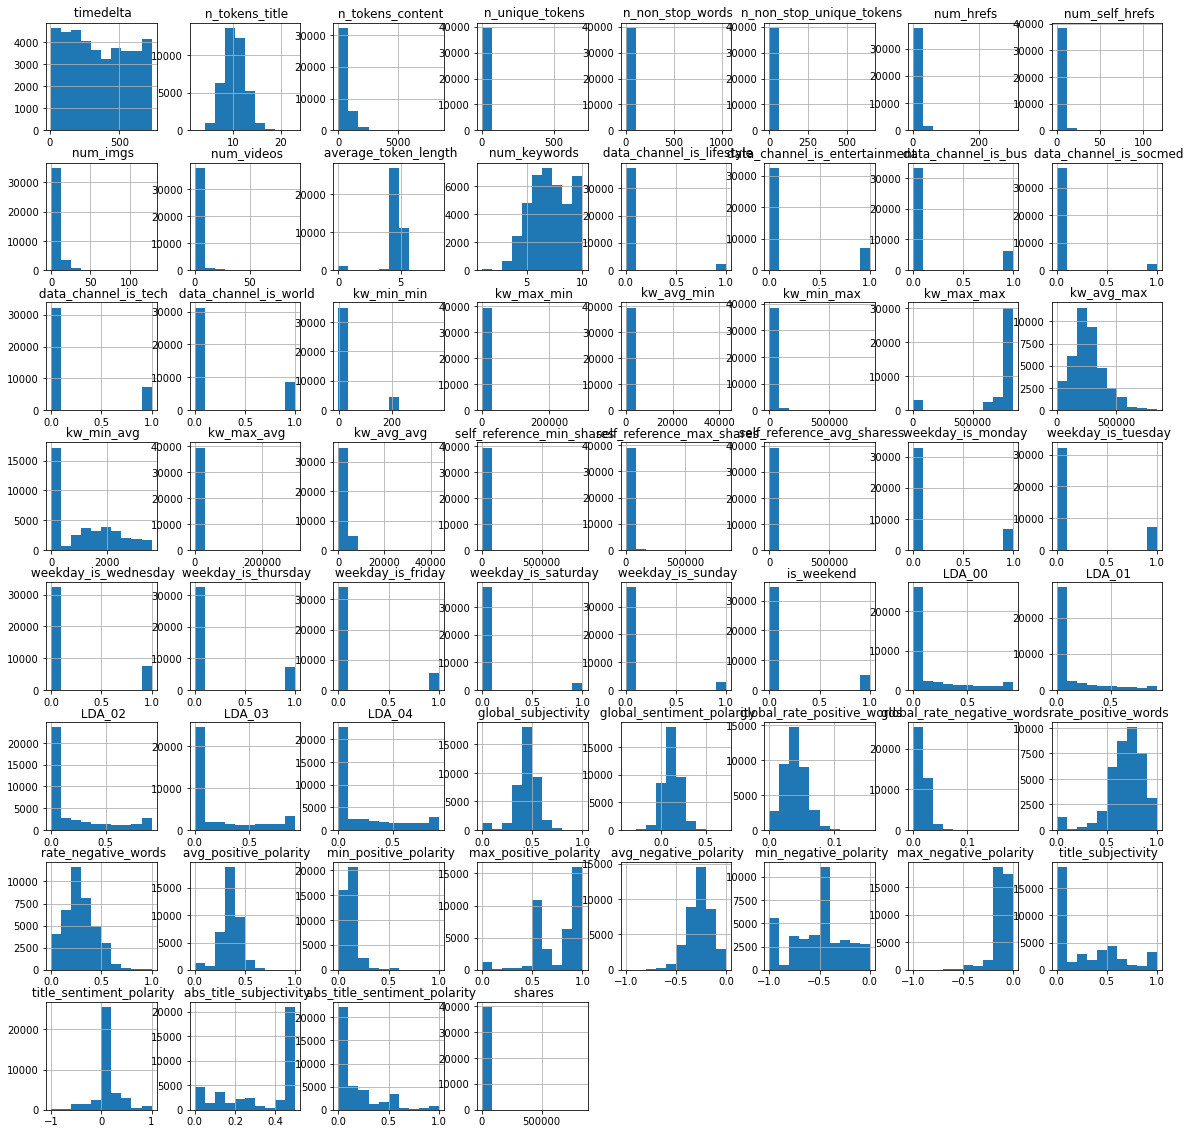

In [12]:
df.hist(figsize=(20,20))
plt.show()

<AxesSubplot:>

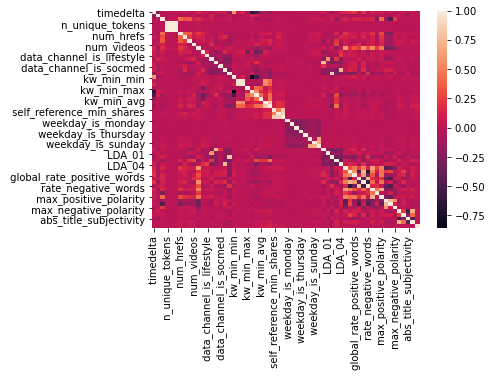

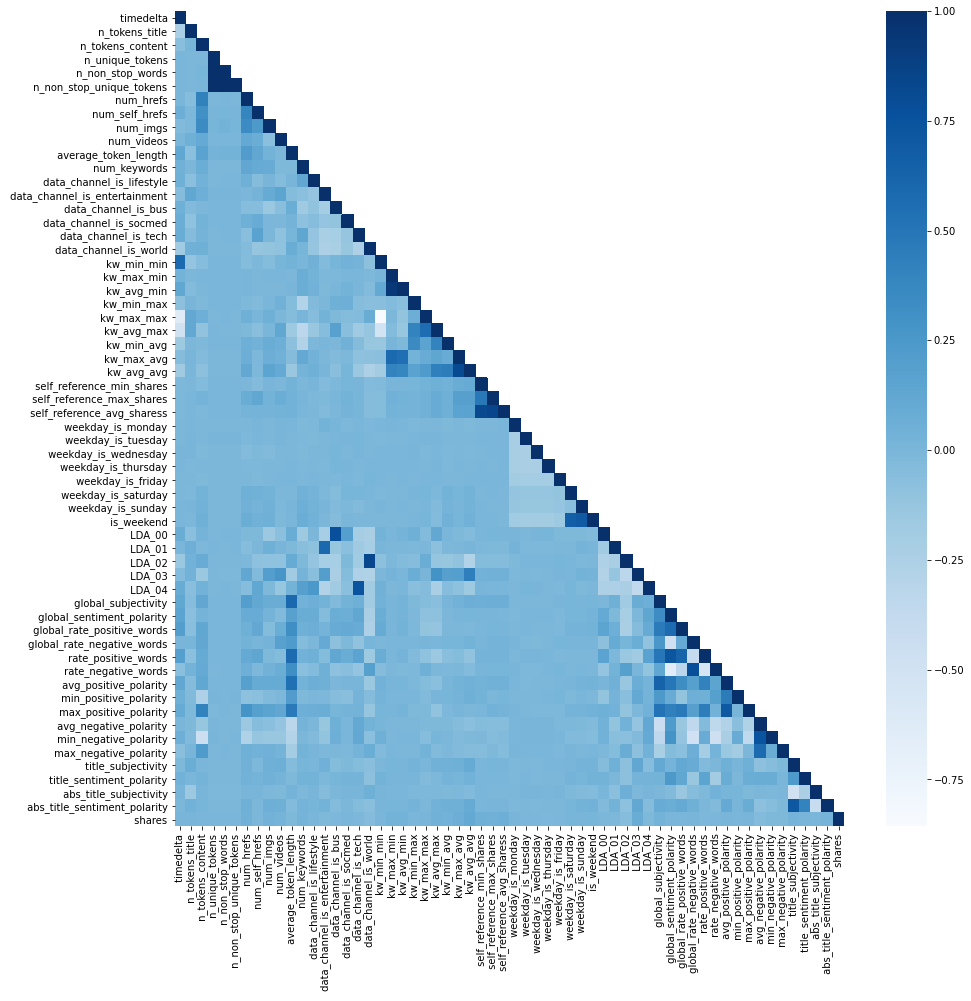

In [13]:
cor=df.corr()
sns.heatmap(cor)
plt.figure(figsize=(15,15))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [14]:
#Removing Space Character from Feature names
df.columns=df.columns.str.replace(" ","")

In [15]:
# n_tokens_content represents Number of words in the content
# However its minimum value to be 0. Means that there are articles that do not have any content.
# Such records should be dropped as their related attributes add no meaning to our analysis

# find number of rows that contain 0 for n_tokens_content
num_of_nowords=df[df['n_tokens_content']==0].index
print('number of news items with no words',num_of_nowords.size)

number of news items with no words 1181


In [16]:
# Drop these items or rows with n_tokens_content = 0

df = df[df['n_tokens_content'] != 0]

In [17]:
# Since URL is a non-numeric attribute and will not add value to our analysis so dropping it from the dataset
# Also timedelta is a non-predictive attribute and not a feature of the data set so we can drop it from the dataset
# Drop highly correlated attributes "n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"
df = df.drop('url',axis=1)
df = df.drop('timedelta',axis=1)
df= df.drop(["n_non_stop_unique_tokens","n_non_stop_words","kw_avg_min"],axis=1)

In [18]:
#Understanding target variable distribution
df['shares'].describe()

count     38463.000000
mean       3355.360398
std       11585.968776
min           1.000000
25%         945.000000
50%        1400.000000
75%        2700.000000
max      843300.000000
Name: shares, dtype: float64

In [19]:
df['shares'].median()

1400.0

In [20]:
# Create a new target variable
df['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

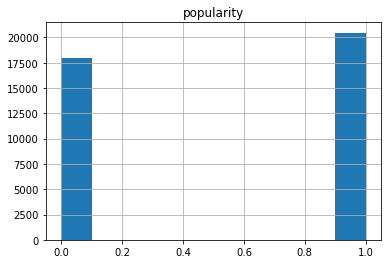

In [21]:
df.hist(column='popularity');

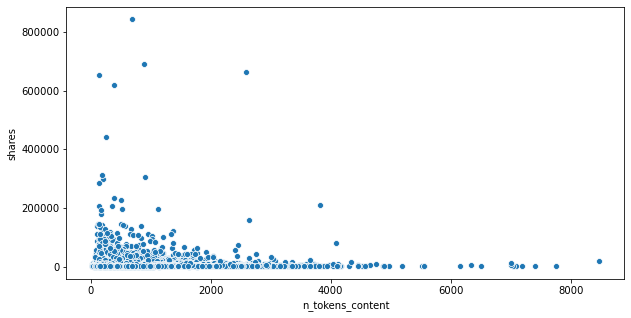

In [22]:
# Number of words in content vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_content', data=df)

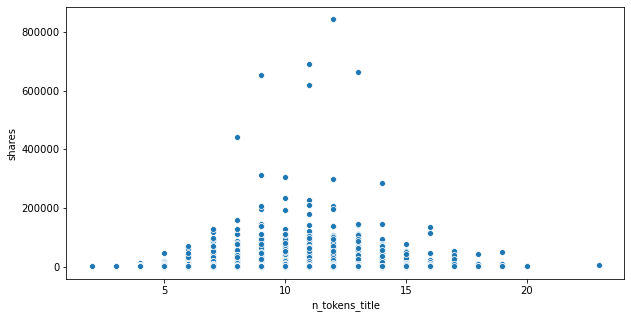

In [23]:
# Number of words in title vs Number of shares

plt.figure(figsize=(10,5))
ax = sns.scatterplot(y='shares', x='n_tokens_title', data=df,palette='muted');

In [24]:
a,b = df['shares'].mean(),df['shares'].median()

In [25]:
print(f'Mean article shares = {a}')
print(f'Median article share = {b}')

Mean article shares = 3355.3603983048642
Median article share = 1400.0


In [26]:
Wday = df.columns.values[26:33]
Wday

array(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday'], dtype=object)

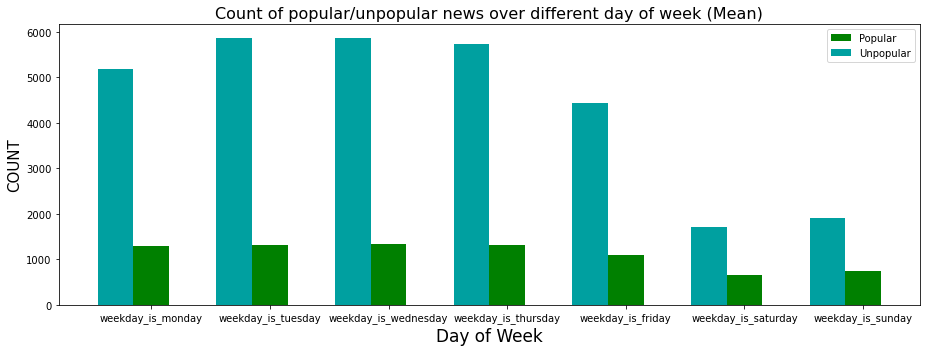

In [27]:
Unpop=df[df['shares']<a]
Pop=df[df['shares']>=a]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Mean)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

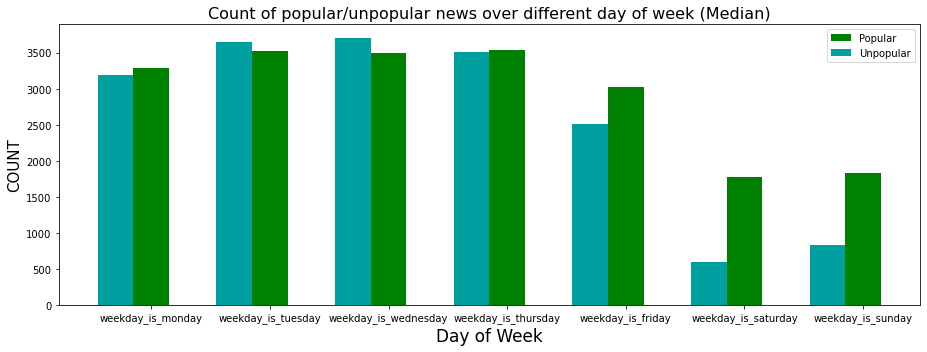

In [28]:
Unpop=df[df['shares']<b]
Pop=df[df['shares']>=b]
Unpop_day = Unpop[Wday].sum().values
Pop_day = Pop[Wday].sum().values

fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different day of week (Median)", fontsize = 16)

plt.bar(np.arange(len(Wday)),Pop_day,width=0.3,align='center',color='g',label='Popular')
plt.bar(np.arange(len(Wday))-0.3,Unpop_day,width=0.3,align='center',color='#00A0A0',label='Unpopular')

plt.xticks(np.arange(len(Wday)),Wday)
plt.ylabel('COUNT',fontsize=15)
plt.xlabel('Day of Week',fontsize=17)
#for i, v in enumerate(Pop_day):
#    fig.text(i+25, 
#              v/Pop_day[i]+50, 
#              Pop_day[i], 
#              fontsize=5)

plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

In [29]:
Dc=df.columns[9:15]
Dc

Index(['data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

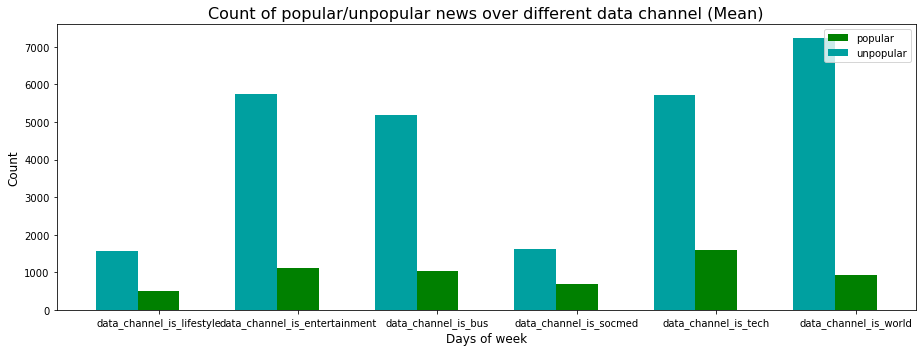

In [30]:
Unpop3=df[df['shares']<a]
Pop3=df[df['shares']>=a]
Unpop_day3 = Unpop3[Dc].sum().values
Pop_day3 = Pop3[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Mean)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day3, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day3, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

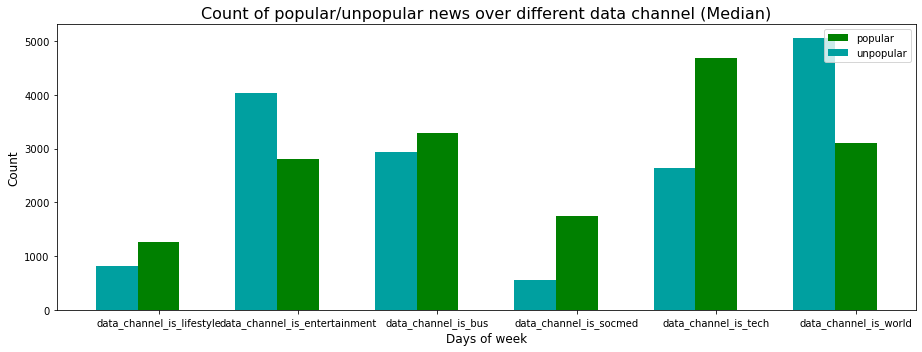

In [31]:
Unpop4=df[df['shares']<b]
Pop4=df[df['shares']>=b]
Unpop_day4 = Unpop4[Dc].sum().values
Pop_day4 = Pop4[Dc].sum().values
fig = plt.figure(figsize = (13,5))
plt.title("Count of popular/unpopular news over different data channel (Median)", fontsize = 16)
plt.bar(np.arange(len(Dc)), Pop_day4, width = 0.3, align="center", color = 'g', \
          label = "popular")
plt.bar(np.arange(len(Dc)) - 0.3, Unpop_day4, width = 0.3, align = "center", color = '#00A0A0', \
          label = "unpopular")
plt.xticks(np.arange(len(Dc)), Dc)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("Days of week", fontsize = 12)
    
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

### Outlier Treatment

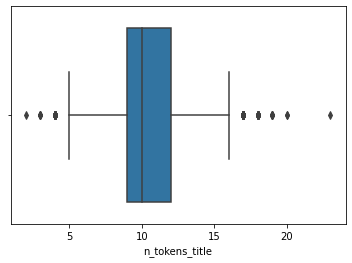

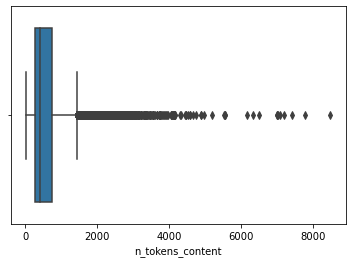

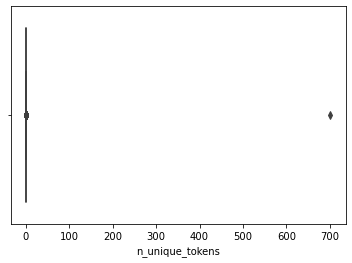

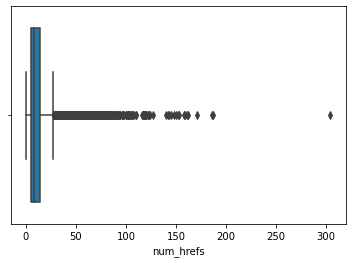

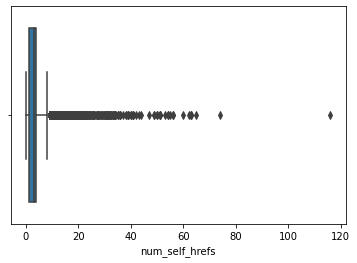

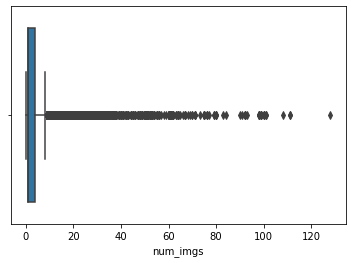

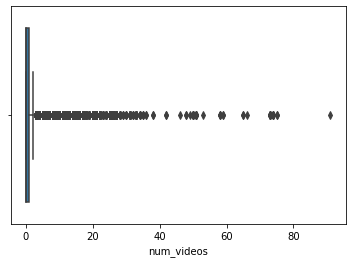

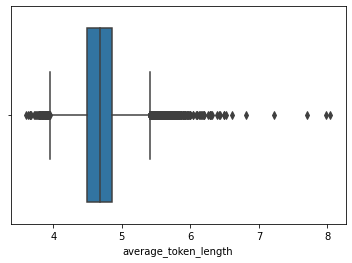

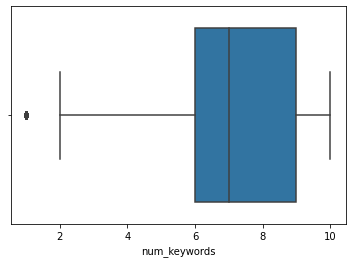

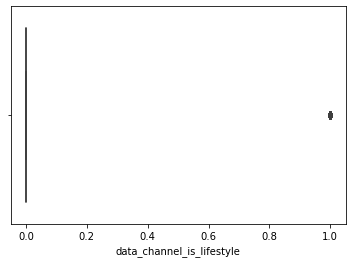

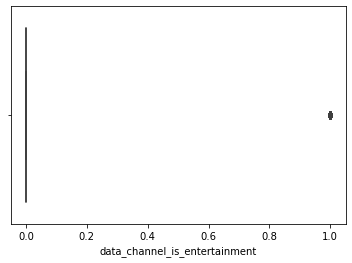

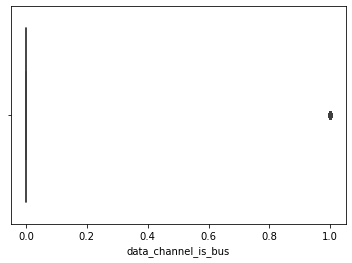

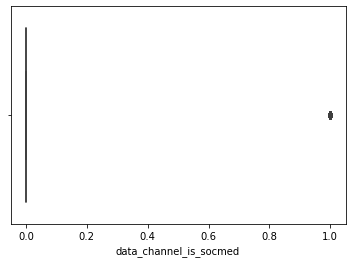

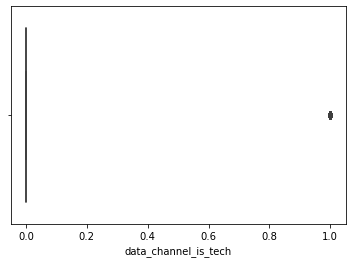

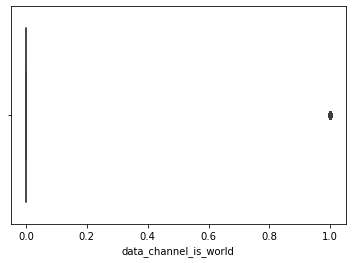

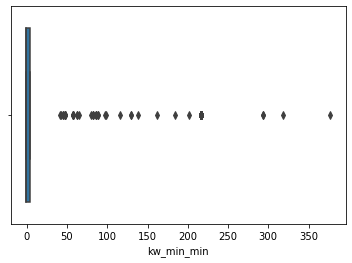

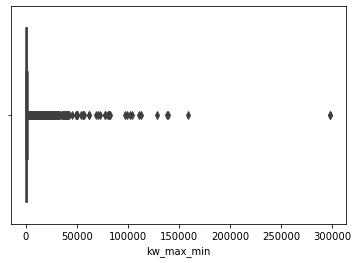

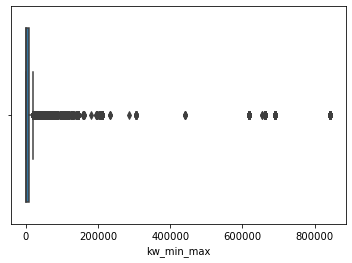

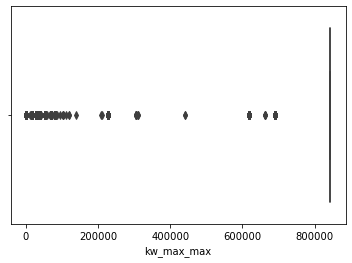

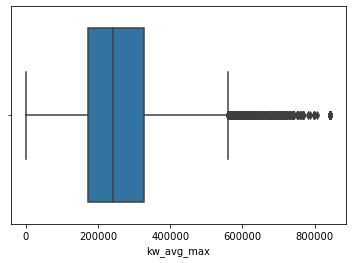

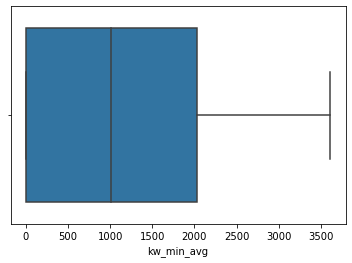

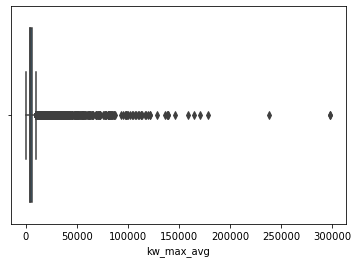

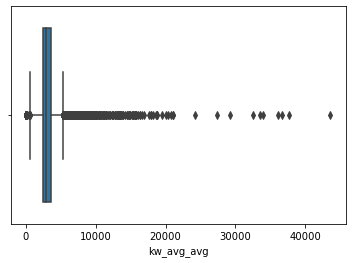

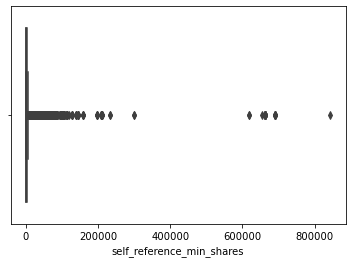

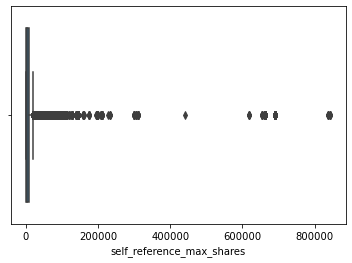

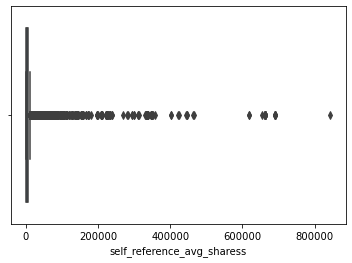

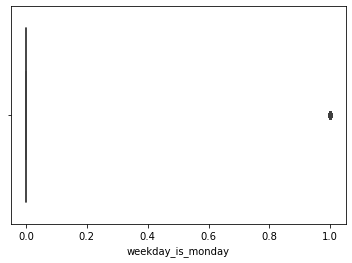

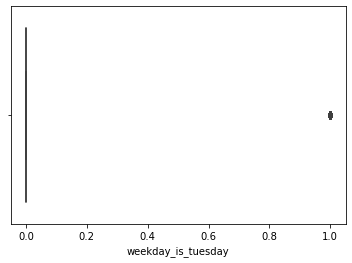

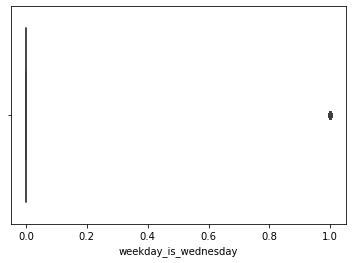

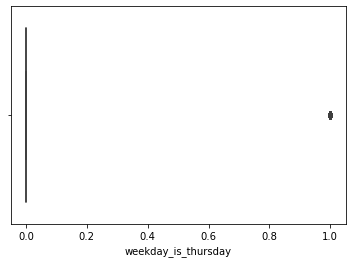

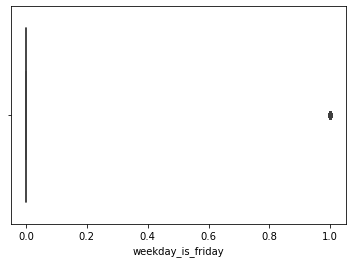

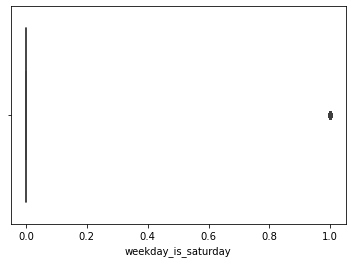

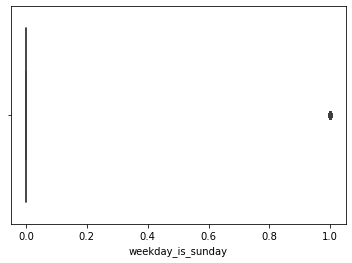

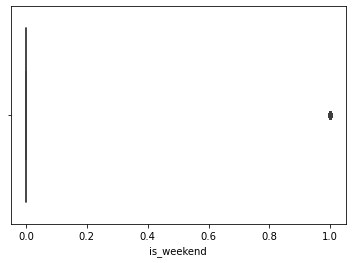

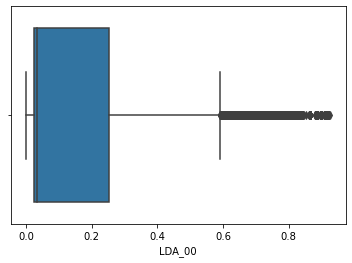

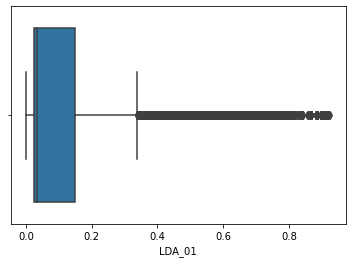

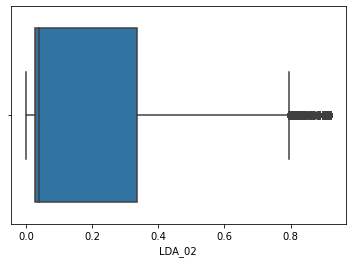

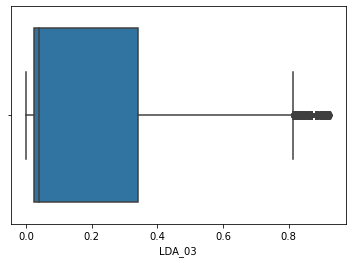

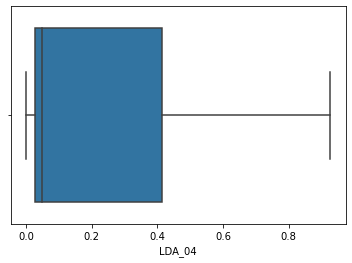

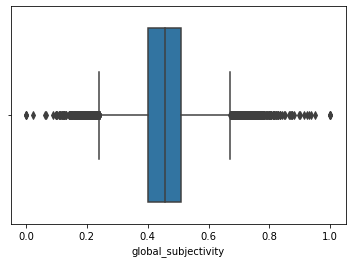

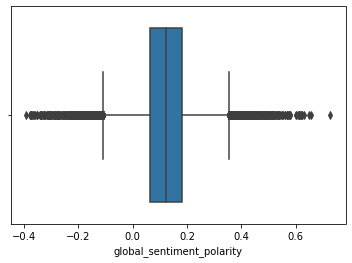

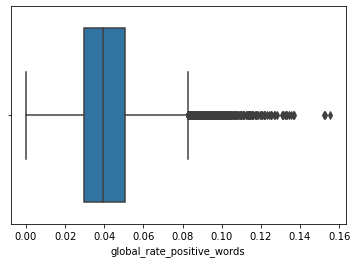

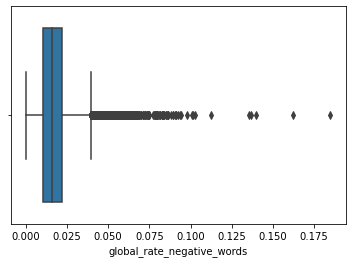

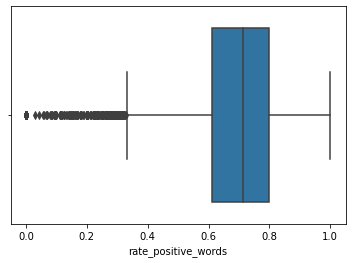

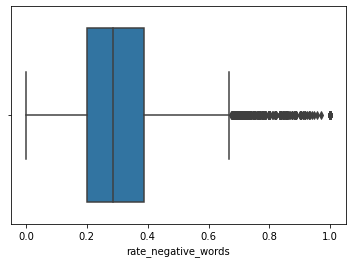

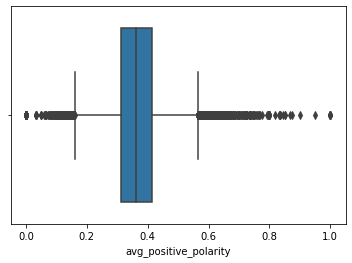

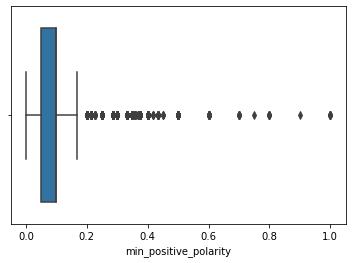

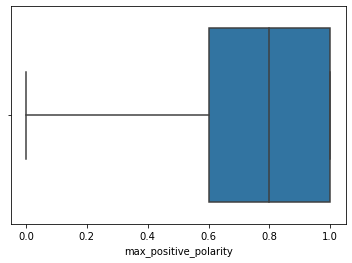

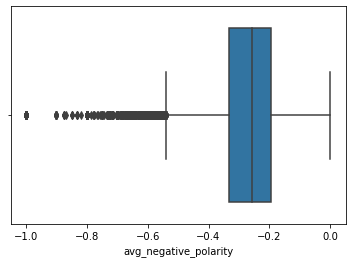

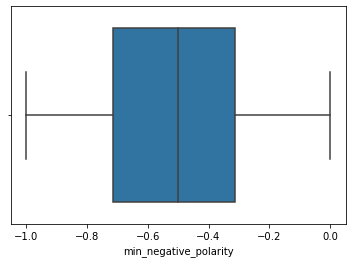

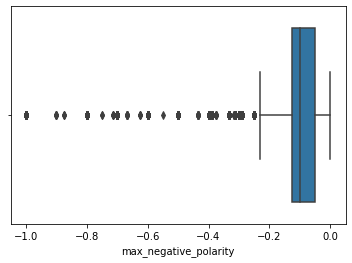

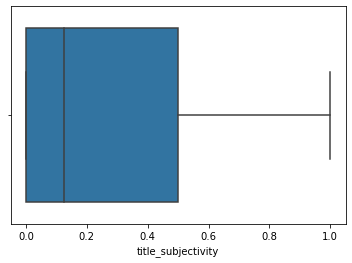

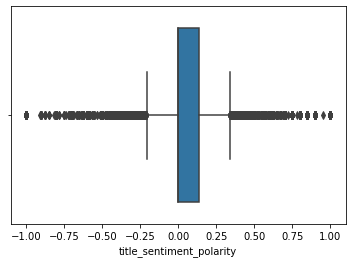

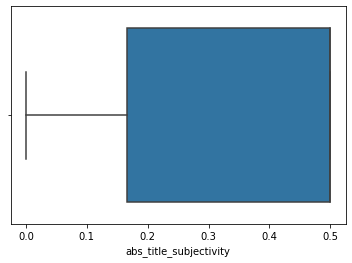

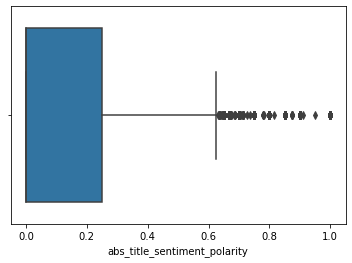

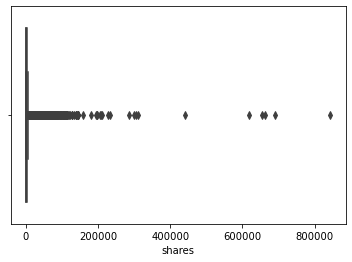

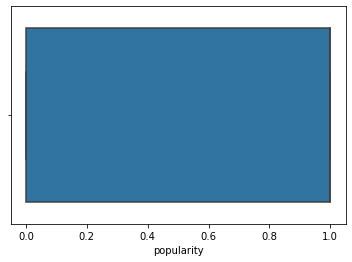

In [32]:
num_cols = df.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df[num_cols[i]])
    plt.show()

In [33]:
for column in num_cols:    
    q1 = df[column].quantile(0.25)    # First Quartile
    q3 = df[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df[(df[column] < llimit) | (df[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 155
4.5
16.5
3.0
Number of outliers in "n_tokens_content" : 1875
-446.0
1434.0
470.0
Number of outliers in "n_unique_tokens" : 490
0.27688172230725006
0.8116487408852499
0.13369175464449995
Number of outliers in "num_hrefs" : 2636
-8.5
27.5
9.0
Number of outliers in "num_self_hrefs" : 2090
-3.5
8.5
3.0
Number of outliers in "num_imgs" : 7466
-3.5
8.5
3.0
Number of outliers in "num_videos" : 2939
-1.5
2.5
1.0
Number of outliers in "average_token_length" : 552
3.9477737410249993
5.410377035785
0.36565082369000024
Number of outliers in "num_keywords" : 50
1.5
13.5
3.0
Number of outliers in "data_channel_is_lifestyle" : 2077
0.0
0.0
0.0
Number of outliers in "data_channel_is_entertainment" : 6856
0.0
0.0
0.0
Number of outliers in "data_channel_is_bus" : 6235
0.0
0.0
0.0
Number of outliers in "data_channel_is_socmed" : 2311
0.0
0.0
0.0
Number of outliers in "data_channel_is_tech" : 7325
0.0
0.0
0.0
Number of outliers in "data_channel_is_world" : 8168

## Scaling of Dataset

In [34]:
# df2_num  dataframe contains numerical feaures.

df2_num=df.drop(["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
                  "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",                  
                  "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"],axis=1)

# df2_cat dataframe contains catagoricl features.

df2_cat=df[["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday",
             "weekday_is_friday","weekday_is_saturday","weekday_is_sunday","is_weekend",            
             "data_channel_is_lifestyle","data_channel_is_entertainment","data_channel_is_bus",
                  "data_channel_is_socmed","data_channel_is_tech","data_channel_is_world"]]

In [35]:
# We will check distribution of attributes to decide the method of scaling

# Drop target variable from df2_num

df2_num = df2_num.drop('shares',axis=1)

In [36]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [37]:
# Finding negative values.

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index(['num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'kw_min_min',
       'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_positive_words',
       'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polarity', 'avg_negative_polarity',
       'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity'],
      dtype='object')

In [38]:
# We will use box-cox method of scaling because the distribution of attributes is not normal and has a lot of negative values

In [39]:
#converting negative values to positive values for applying Box-Cox method and creating new feature.

for i in negcols:
    m=df2_num[i].min()
    name=i +'_new'
    df2_num[name]=((df2_num[i]+1)-m)

In [40]:
df2_num.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03',
       'LDA_04', 'global_subjectivity', 'global_sentiment_polarity',
       'global_rate_positive_words', 'global_rate_negative_words',
       'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_positive_polarity', 'max_positive_polarity',
       'avg_negative_polarity', 'min_negative_polarity',
       'max_negative_polarity', 'title_subjectivity',
       'title_sentiment_polarity', 'abs_title_subjectivity',
       'abs_title_sentiment_polarity', 'popularity', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_v

In [41]:
# Droping old negative column

for i in negcols:
    df2_num.drop(i,axis=1,inplace=True)

In [42]:
# Checking negative columns

negcols=df2_num.columns[(df2_num<=0).any()]
negcols

Index([], dtype='object')

In [43]:
from sklearn import preprocessing
pt=preprocessing.PowerTransformer(method='box-cox',standardize=False)
df2_num_add=pt.fit_transform(df2_num)
df2_num_add=(pd.DataFrame(df2_num_add,columns=df2_num.columns))

In [44]:
#Treating outlier :  

for col in df2_num_add.columns:
    percentiles = df2_num_add[col].quantile([0.01,0.99]).values
    df2_num_add[col][df2_num_add[col] <= percentiles[0]] = percentiles[0]
    df2_num_add[col][df2_num_add[col] >= percentiles[1]] = percentiles[1]

In [45]:
# Checking outliers again

num_cols = df2_num_add.select_dtypes(['int64','float64']).columns

for column in num_cols:    
    q1 = df2_num_add[column].quantile(0.25)    # First Quartile
    q3 = df2_num_add[column].quantile(0.75)    # Third Quartile
    IQR = q3 - q1                            # Inter Quartile Range

    llimit = q1 - 1.5*IQR                       # Lower Limit
    ulimit = q3 + 1.5*IQR                        # Upper Limit

    outliers = df2_num_add[(df2_num_add[column] < llimit) | (df2_num_add[column] > ulimit)]
    print('Number of outliers in "' + column + '" : ' + str(len(outliers)))
    print(llimit)
    print(ulimit)
    print(IQR)

Number of outliers in "n_tokens_title" : 0
3.0351766196848686
9.255141622951946
1.5549912508167694
Number of outliers in "n_tokens_content" : 0
3.8606109358471805
7.438987854892925
0.8945942297614362
Number of outliers in "n_unique_tokens" : 521
-1.1447330796544382
-0.114579958727683
0.2575382802316888
Number of outliers in "average_token_length" : 0
0.7213218976211404
0.7805063649014634
0.014796116820080751
Number of outliers in "num_keywords" : 0
0.08898030896099218
14.927545776135672
3.7096413667936696
Number of outliers in "num_hrefs_new" : 0
0.549171638846343
3.43450060777549
0.7213322422322868
Number of outliers in "num_self_hrefs_new" : 0
-0.6296914647744499
2.8728195483185948
0.8756277532732611
Number of outliers in "num_imgs_new" : 0
-0.16197366610802344
1.8075267721179116
0.4923751095564838
Number of outliers in "num_videos_new" : 0
-0.6194220377541412
1.0323700629235686
0.41294802516942747
Number of outliers in "kw_min_min_new" : 0
-1.7368309261901067
2.8947182103168445
1.15

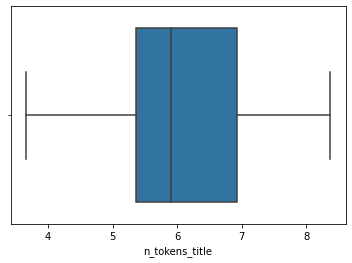

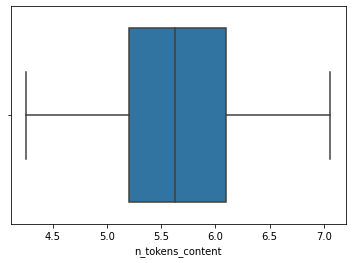

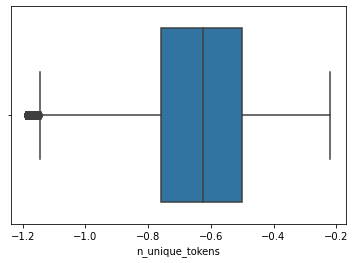

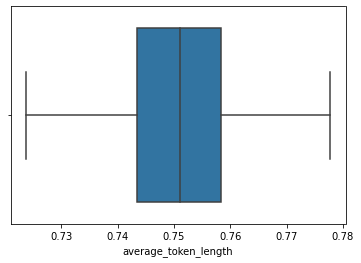

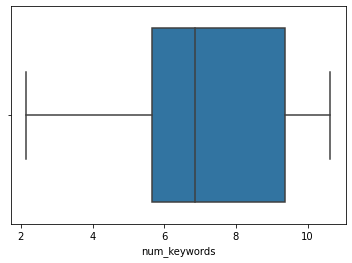

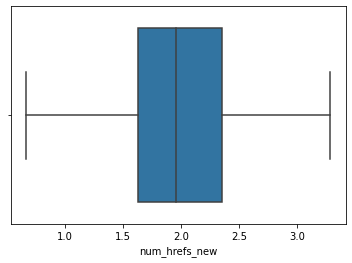

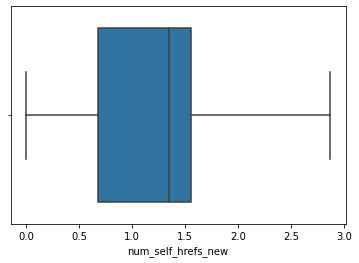

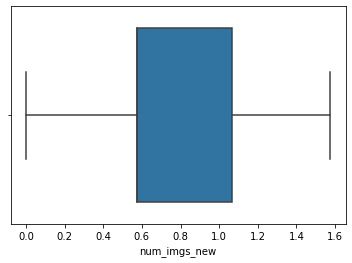

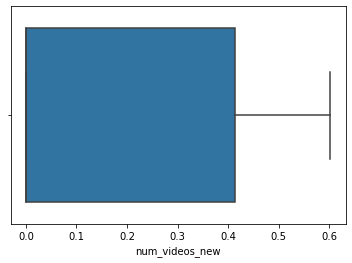

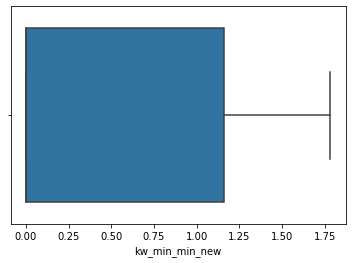

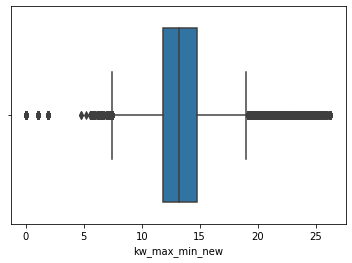

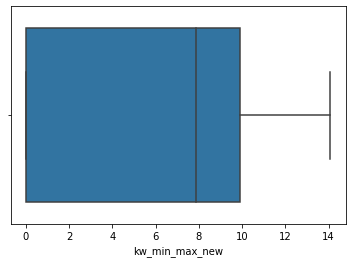

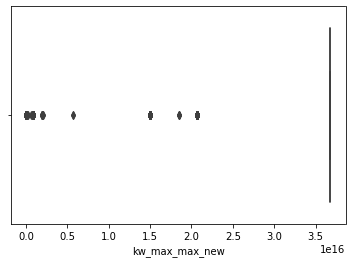

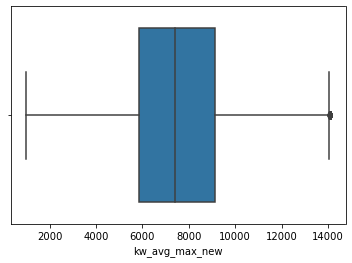

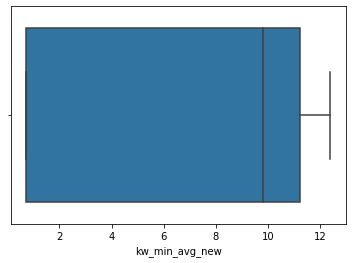

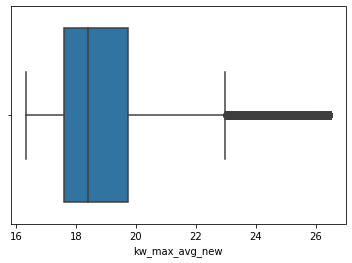

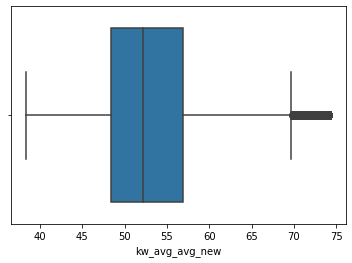

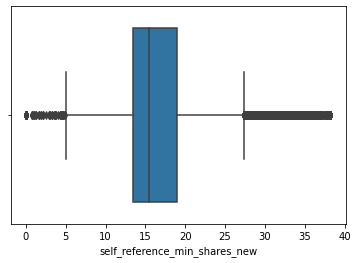

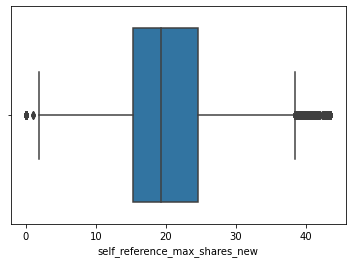

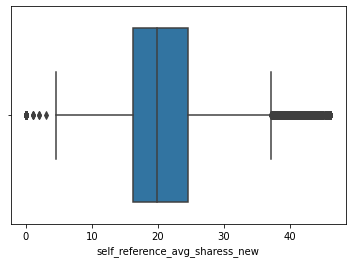

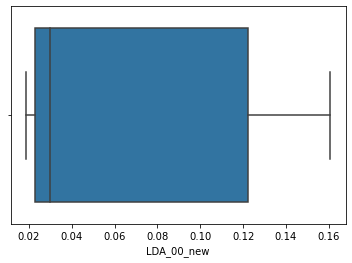

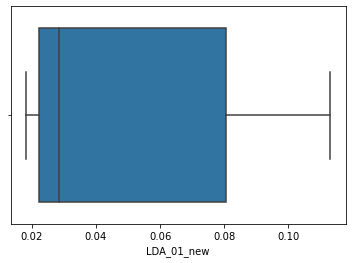

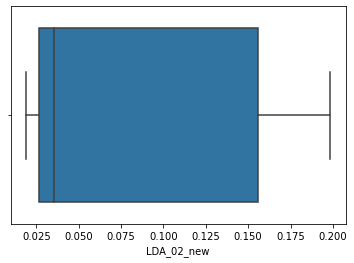

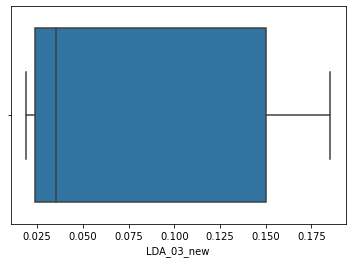

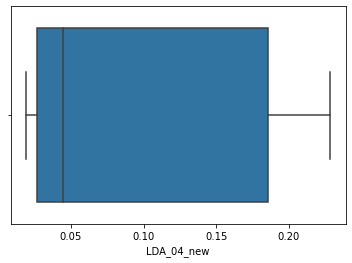

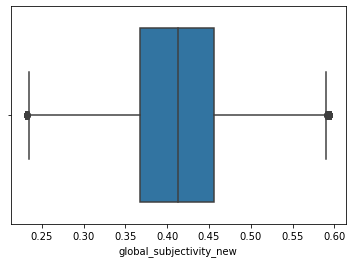

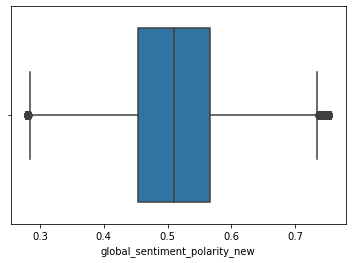

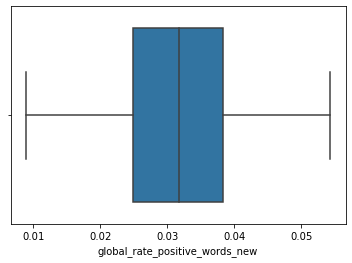

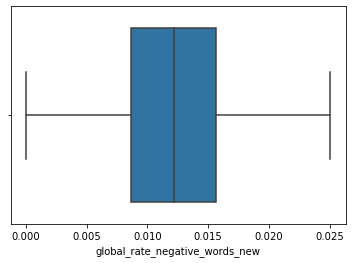

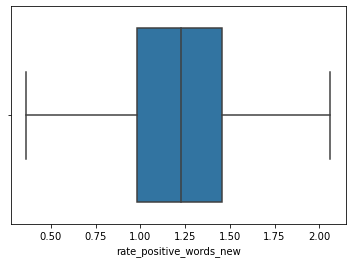

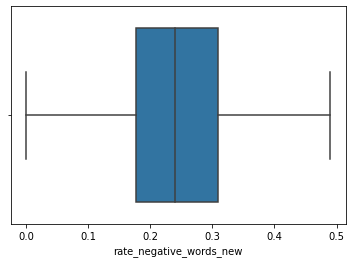

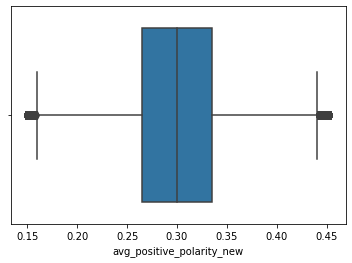

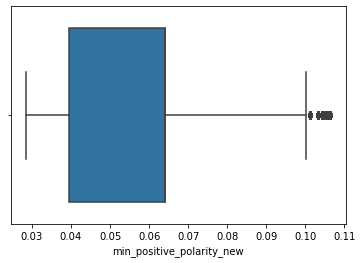

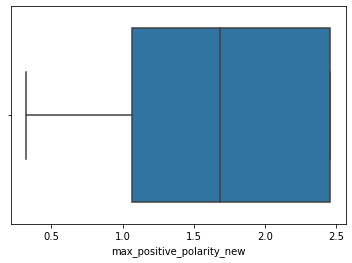

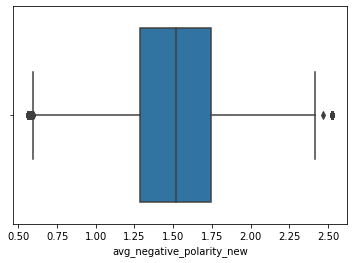

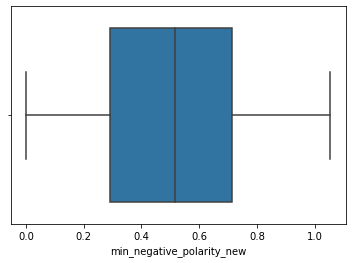

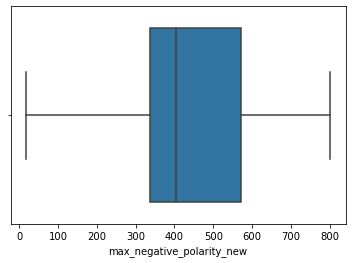

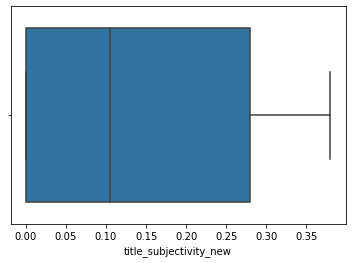

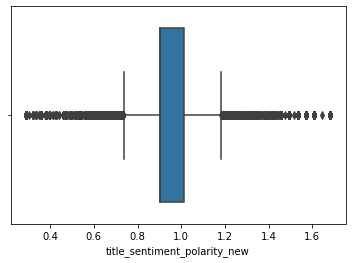

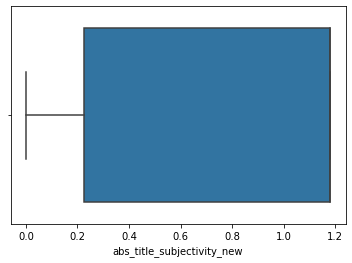

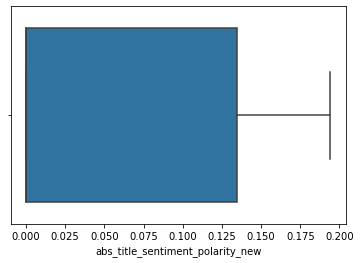

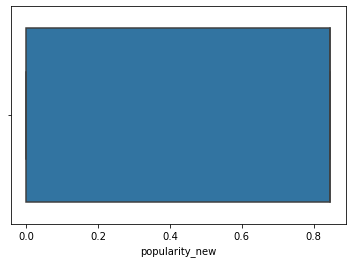

In [46]:
num_cols = df2_num_add.select_dtypes(['int64','float64']).columns
for i in range(len(num_cols)):
    sns.boxplot(df2_num_add[num_cols[i]])
    plt.show()

In [47]:
df2_num_add.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [48]:
df2_cat.columns

Index(['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world'],
      dtype='object')

In [49]:
# Combining numeric features and catogorical features.

df_final=pd.concat([df2_num_add,df2_cat],axis=1)

In [50]:
df_final.shape

(39518, 56)

In [51]:
df_final['popularity'] = df['shares'].apply(lambda x: 0 if x <1400 else 1)

In [52]:
df_final.isnull().sum()

n_tokens_title                      1055
n_tokens_content                    1055
n_unique_tokens                     1055
average_token_length                1055
num_keywords                        1055
num_hrefs_new                       1055
num_self_hrefs_new                  1055
num_imgs_new                        1055
num_videos_new                      1055
kw_min_min_new                      1055
kw_max_min_new                      1055
kw_min_max_new                      1055
kw_max_max_new                      1055
kw_avg_max_new                      1055
kw_min_avg_new                      1055
kw_max_avg_new                      1055
kw_avg_avg_new                      1055
self_reference_min_shares_new       1055
self_reference_max_shares_new       1055
self_reference_avg_sharess_new      1055
LDA_00_new                          1055
LDA_01_new                          1055
LDA_02_new                          1055
LDA_03_new                          1055
LDA_04_new      

In [53]:
df_final=df_final.dropna()

In [54]:
df_final.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'average_token_length', 'num_keywords', 'num_hrefs_new',
       'num_self_hrefs_new', 'num_imgs_new', 'num_videos_new',
       'kw_min_min_new', 'kw_max_min_new', 'kw_min_max_new', 'kw_max_max_new',
       'kw_avg_max_new', 'kw_min_avg_new', 'kw_max_avg_new', 'kw_avg_avg_new',
       'self_reference_min_shares_new', 'self_reference_max_shares_new',
       'self_reference_avg_sharess_new', 'LDA_00_new', 'LDA_01_new',
       'LDA_02_new', 'LDA_03_new', 'LDA_04_new', 'global_subjectivity_new',
       'global_sentiment_polarity_new', 'global_rate_positive_words_new',
       'global_rate_negative_words_new', 'rate_positive_words_new',
       'rate_negative_words_new', 'avg_positive_polarity_new',
       'min_positive_polarity_new', 'max_positive_polarity_new',
       'avg_negative_polarity_new', 'min_negative_polarity_new',
       'max_negative_polarity_new', 'title_subjectivity_new',
       'title_sentiment_polarity_new

In [55]:
df_final.shape

(37408, 57)

## Classification Model :

### BASE MODEL: AdaBoost Classifier,Logistic Regression,Random Forest

In [56]:
modelscore=[]
X=df_final.drop(['popularity','popularity_new'],axis=1)
y=df_final['popularity']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [57]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    start = time() # Get start time
    learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time

    results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:4000])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
    results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
    results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
    results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
    results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
    print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']) )
    # Return the results
    #cm=confusion_matrix(y_test,predictions_test)
    #df_cm = pd.DataFrame(cm, range(2), range(2))
    # plt.figure(figsize=(10,7))
    #sns.set(font_scale=1.4) # for label size
    #sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

    #plt.show()
    return results


In [58]:
import matplotlib.patches as mpatches
def evaluate(results,name):
    """
    Visualization code to display results of various learners.
    
    inputs:
      - learners: a list of supervised learners
      - stats: a list of dictionaries of the statistic results from 'train_predict()'
      - accuracy: The score for the naive predictor
      - f1: The score for the naive predictor
    """
  
    # Create figure
    fig, ax = plt.subplots(2, 4, figsize = (16,7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000','#00A0A0','#00A000']
    
    # Super loop to plot four panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'auc_train','pred_time', 'acc_test',\
                                    'f_test', 'auc_test']):
            for i in np.arange(3):
                
                # Creative plot code
                ax[j//4, j%4].bar(i+k*bar_width, results[learner][i][metric], width = bar_width, color = colors[k])
                ax[j//4, j%4].set_xticks([0.45, 1.45, 2.45])
                ax[j//4, j%4].set_xticklabels(["1%", "10%", "100%"])
                ax[j//4, j%4].set_xlim((-0.1, 3.0))
    
    # Add labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[0, 3].set_ylabel("AUC")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")
    ax[1, 3].set_ylabel("AUC")
    ax[1, 0].set_xlabel("Training Set Size")
    ax[1, 1].set_xlabel("Training Set Size")
    ax[1, 2].set_xlabel("Training Set Size")
    ax[1, 3].set_xlabel("Training Set Size")
    
    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[0, 3].set_title("AUC on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")
    ax[1, 3].set_title("AUC on Testing Subset")
    
    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[0, 3].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))
    ax[1, 3].set_ylim((0, 1))

    # Create patches for the legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = learner))
    plt.legend(handles = patches,  bbox_to_anchor = (-1.4, 2.54),\
               loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.savefig(name)
    plt.tight_layout()
    plt.show()


AdaBoostClassifier trained on 299 samples.
AdaBoostClassifier with accuracy 0.5303394814220797, F1 0.576830443159923 and AUC 0.5253225819302438.
AdaBoostClassifier trained on 2992 samples.
AdaBoostClassifier with accuracy 0.5846030473135525, F1 0.619676945668135 and AUC 0.5810273309331744.
AdaBoostClassifier trained on 29926 samples.
AdaBoostClassifier with accuracy 0.6225608126169473, F1 0.667842860503411 and AUC 0.616173531539179.
LogisticRegression trained on 299 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
LogisticRegression trained on 2992 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
LogisticRegression trained on 29926 samples.
LogisticRegression with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
RandomForestClassifier trained on 299 samples.
RandomForestClassifier with accuracy 0.5279337075648223, F1 0.6093784560937846 and AUC 0.5162312206292223.
RandomForestC

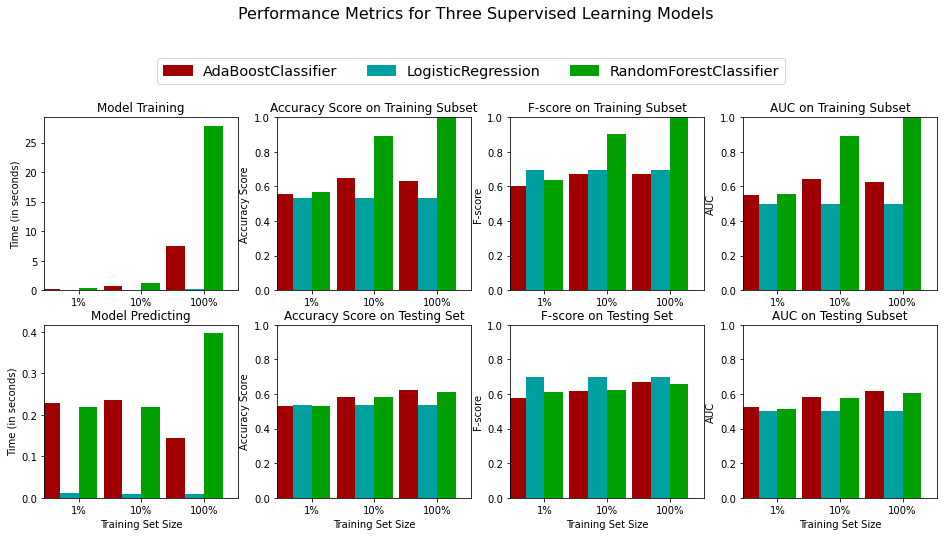

In [59]:
# Import the three supervised learning models from sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from time import time
from IPython.display import display
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score

# Initialize the three models
clf_A = AdaBoostClassifier(random_state=0)
clf_B = LogisticRegression(random_state=0,C=1.0)
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt.pdf')


GaussianNB trained on 299 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 2992 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
GaussianNB trained on 29926 samples.
GaussianNB with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 299 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 2992 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
SVC trained on 29926 samples.
SVC with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
KNeighborsClassifier trained on 299 samples.
KNeighborsClassifier with accuracy 0.5134990644212777, F1 0.5744680851063829 and AUC 0.5061443510666451.
KNeighborsClassifier trained on 2992 samples.
KNeighborsClassifier with accuracy 0.5134990644212777, F1 0.5571776155717763 and AUC 0.5091651146169598.
KNeighborsClassifier trained on 29926 samples

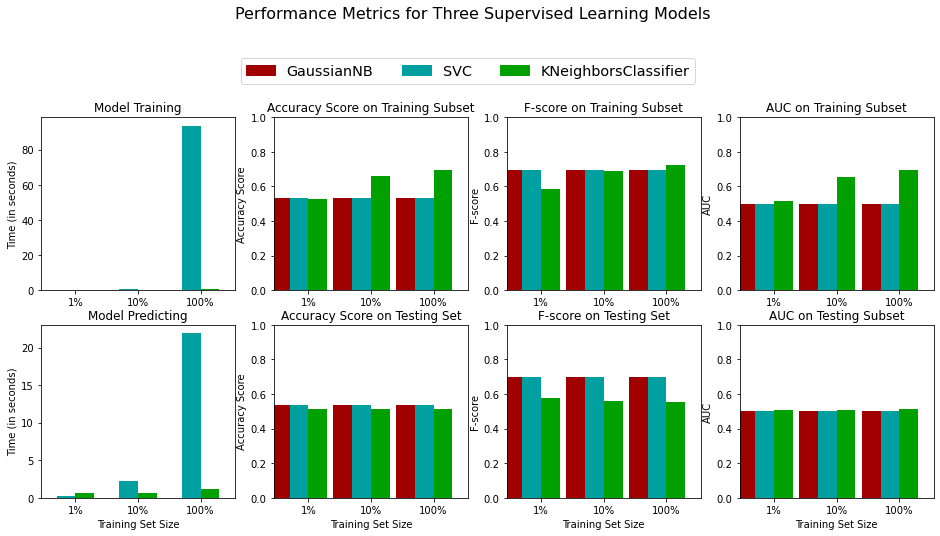

In [60]:
# Initialize the three models
import sklearn
from sklearn.neighbors import KNeighborsClassifier
clf_A =GaussianNB()
clf_B = SVC(random_state=0,C=1.0)
clf_C = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt1.pdf')


SGDClassifier trained on 299 samples.
SGDClassifier with accuracy 0.4663191659983961, F1 0.0 and AUC 0.5.
SGDClassifier trained on 2992 samples.
SGDClassifier with accuracy 0.4663191659983961, F1 0.0 and AUC 0.5.
SGDClassifier trained on 29926 samples.
SGDClassifier with accuracy 0.5336808340016038, F1 0.6959477124183007 and AUC 0.5.
BaggingClassifier trained on 299 samples.
BaggingClassifier with accuracy 0.5201817695803261, F1 0.5437214031520081 and AUC 0.5190618405942127.
BaggingClassifier trained on 2992 samples.
BaggingClassifier with accuracy 0.5684309008286554, F1 0.5733914651869467 and AUC 0.5702351212644484.
BaggingClassifier trained on 29926 samples.
BaggingClassifier with accuracy 0.5740443731622561, F1 0.5716973525063835 and AUC 0.5770318392526561.
DecisionTreeClassifier trained on 299 samples.
DecisionTreeClassifier with accuracy 0.5195134990644212, F1 0.5550191855427652 and AUC 0.5164821972415614.
DecisionTreeClassifier trained on 2992 samples.
DecisionTreeClassifier with

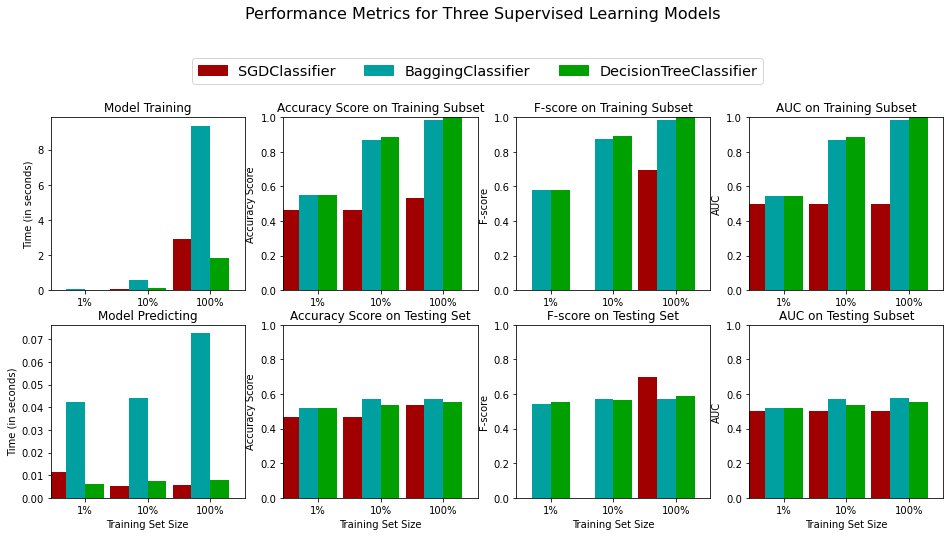

In [61]:
import Lightgbm as lgb

clf_A =SGDClassifier()
clf_B = BaggingClassifier(random_state=0)
clf_C = DecisionTreeClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train.shape[0]*0.01)
samples_10 = int(X_train.shape[0]*0.1)
samples_100 = X_train.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        if clf == clf_A:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        elif clf == clf_B:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)
        else:
            results[clf_name][i] = \
            train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
evaluate(results,'perf_unopt1.pdf')

In [ ]:
# LIGHTGBM MODEL:
import lightgbm as lgbm

In [63]:
lgbm=lgb.LGBMClassifier()
lgbm.fit(X_train,y_train)
#y_test1=np.array_test).reshape(-1,1)
y_pred=lgbm.predict(X_test)
#print('Score on train set ',score(X_train,y_train))
print('accuracy on test set ',accuracy_score(y_test,y_pred))

NameError: name 'lgb' is not defined

In [ ]:
type(y_test)

## Feature Selection

In [ ]:
# Feature selection
# USING BACKWARD ELIMINATION
from sklearn.feature_selection import RFE
cols=df_final.columns
model=RandomForestClassifier()
rfe=RFE(model,57)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

In [ ]:
#Best model till now :Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_prob_train=rf.predict_proba(x_train)[:,1]

y_pred=rf.predict(x_test)
y_prob=rf.predict_proba(x_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y_train))
print('Accuracy of Random forest test:',accuracy_score(y_pred,y_test))


print('AUC of Random forest train :',roc_auc_score(y_train,y_prob_train))
print('AUC of Random forest test :',roc_auc_score(y_test,y_prob))

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## Hyperparameter tuning of random forest #randomsearch

In [ ]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
rf=RandomForestClassifier(random_state=1)

params={'n_estimators':sp_randint(5,25),
       'criterion':['gini','entropy'],
       'max_depth':sp_randint(2,10),
       'min_samples_split':sp_randint(2,20),
       'min_samples_leaf':sp_randint(1,20),
       'max_features':sp_randint(2,15)}
rand_search_rfc=RandomizedSearchCV(rf,param_distributions=params,cv=3,random_state=1)

rand_search_rfc.fit(X,y)

print(rand_search_rfc.best_params_)

In [ ]:
rf=RandomForestClassifier(**rand_search_rfc.best_params_)
rf.fit(x_train,y_train)
y_pred_train=rf.predict(x_train)
y_prob_train=rf.predict_proba(x_train)[:,1]

y_pred=rf.predict(x_test)
y_prob=rf.predict_proba(x_test)[:,1]  #used to find AUC of train and test

from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score

print('Accuracy of Random forest train :',accuracy_score(y_pred_train,y_train))
print('Accuracy of random forest test :',accuracy_score(y_pred,y_test))


print('AUC of random forest train :',roc_auc_score(y_train,y_prob_train))
print('AUC of random forest test :',roc_auc_score(y_test,y_prob))

In [ ]:
fpr,tpr,threshold=roc_curve(y_test,y_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()